<h1 style="font-weight: bold; background: linear-gradient(to right, teal, skyblue); -webkit-background-clip: text; color: transparent;">
  Multiple Linear Regression Model: A Comprehensive Overview
</h1>

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Basic Notation Framework
</h2>

- **n**: Number of observations
- **p**: Number of predictor variables (including intercept)
- **y**: Response variable
- **X**: Matrix of predictor variables
- **β**: Vector of regression coefficients
- **ε**: Vector of random errors
- **i**: Index for observations (i = 1,...,n)
- **j**: Index for predictors (j = 1,...,p)
- **⊤**: Transpose of a matrix/vector
- **^**: Indicates an estimated value
- **(i)**: Denotes computation with the ith observation removed
- **ȳ**: Mean of y values

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Model Structure
</h2>

The model is represented as:
$$
\mathbf{y}_{(n \times 1)} = \mathbf{X}_{(n \times p)} \boldsymbol{\beta}_{(p \times 1)} + \boldsymbol{\epsilon}_{(n \times 1)}
$$

Where:
- $\mathbf{y}_{(n \times 1)} = (y_1, y_2, \dots, y_n)^\top$ is the response vector
- $\mathbf{X}_{(n \times p)}$ = Design matrix, with the first column consisting of 1’s for the intercept
- $\boldsymbol{\beta}_{(p \times 1)} = (\beta_0, \beta_1, \dots, \beta_{p-1})^\top$ is the vector of regression coefficients
- $\boldsymbol{\epsilon}_{(n \times 1)} = (\epsilon_1, \epsilon_2, \dots, \epsilon_n)^\top$ is the error vector, where $\epsilon_i \sim N(0, \sigma^2)$

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Least Squares Solution
</h2>

The estimated regression coefficients are computed as:
$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{y}
$$

### Properties of the Least Squares Estimator:
- **BLUE** (Best Linear Unbiased Estimator)
- Has the minimum variance among all unbiased estimators
- Maximum likelihood estimator when errors follow a normal distribution

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Hat (Projection) Matrix
</h2>

The hat matrix is given by:
$$
\mathbf{H}_{(n \times n)} = \mathbf{X} (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top
$$

### Properties:
- $\mathbf{H}$ is symmetric: $\mathbf{H} = \mathbf{H}^\top$
- $\mathbf{H}$ is idempotent: $\mathbf{H} \mathbf{H} = \mathbf{H}$
- Rank of $\mathbf{H}$ is equal to p, i.e., Rank($\mathbf{H}$) = trace($\mathbf{H}$) = p
- The fitted values are: $\hat{\mathbf{y}} = \mathbf{H} \mathbf{y}$

## Leverage Values
The leverage for each observation is:
$$
h_{ii} = \mathbf{x}_i^\top (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{x}_i
$$

Where:
- $h_{ii}$ is the ith diagonal element of $\mathbf{H}$
- $\mathbf{x}_i^\top$ is the ith row of $\mathbf{X}$

### Diagnostics:
- Average leverage: $\frac{p}{n}$
- High leverage points: $h_{ii} > \frac{2p}{n}$ or $h_{ii} > \frac{3p}{n}$
- Leverage values are bounded: $0 \leq h_{ii} \leq 1$
- The sum of the leverages equals p: $\sum h_{ii} = p$

## Decomposition of Variability
Let:
- $\hat{y}_i$ be the fitted value for the ith observation
- $\bar{y}$ be the mean of the response variable y
- $e_i = y_i - \hat{y}_i$ be the residual for the ith observation

### Total Sum of Squares (TSS):
$$
\text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2 = \mathbf{y}^\top \mathbf{y} - n \bar{y}^2
$$

### Regression Sum of Squares (SSR):
$$
\text{SSR} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

### Error Sum of Squares (SSE):
$$
\text{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n e_i^2 = \mathbf{e}^\top \mathbf{e}
$$

The relationship: 
$$
\text{TSS} = \text{SSR} + \text{SSE}
$$

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Cross-Validation and PRESS
</h2>

### Leave-One-Out Cross-Validation (LOOCV)
For each observation $i = 1, \dots, n$:
1. Remove observation $i$: $(x_{(i)}, y_{(i)})$
2. Fit the model with the remaining $(n-1)$ observations
3. Compute the predicted value: $\hat{y}_{(i)}$
4. Calculate the prediction error: $e_{(i)} = y_{(i)} - \hat{y}_{(i)}$

### PRESS (Prediction Residual Error Sum of Squares)
1. **Original Formula** (with recomputation):
   $$
   \hat{\boldsymbol{\beta}}_{(i)} = (\mathbf{X}_{(i)}^\top \mathbf{X}_{(i)})^{-1} \mathbf{X}_{(i)}^\top \mathbf{y}_{(i)}
   $$
   $$
   \hat{y}_{(i)} = \mathbf{x}_i^\top \hat{\boldsymbol{\beta}}_{(i)}
   $$
   $$
   \text{PRESS} = \sum_{i=1}^n (y_i - \hat{y}_{(i)})^2
   $$

2. **Efficient Formula** (no recomputation):
   $$
   \text{PRESS} = \sum_{i=1}^n \left( \frac{e_i}{1 - h_{ii}} \right)^2
   $$

   Where:

   
   $e_i = y_i - \hat{y}_i$ is the residual for the ith observation

   
   $h_{ii} = \mathbf{x}_i^\top (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{x}_i$ is the leverage value of ith observation

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Model Quality Measures
</h2>

Let:
- **df_model** = p - 1 (degrees of freedom for the model)
- **df_error** = n - p (degrees of freedom for error)
- **df_total** = n - 1 (total degrees of freedom)

### R² (Coefficient of Determination):
$$
R^2 = 1 - \frac{\text{SSE}}{\text{TSS}} = \frac{\text{SSR}}{\text{TSS}}
$$

### Adjusted R²:
$$
R^2_{\text{adj}} = 1 - \frac{\text{SSE} / \text{df}_{\text{error}}}{\text{TSS} / \text{df}_{\text{total}}} = 1 - \frac{\text{SSE} / (n - p)}{\text{TSS} / (n - 1)}
$$

### Predictive R²:
$$
R^2_{\text{pred}} = 1 - \frac{\text{PRESS}}{\text{TSS}}
$$

<h2 style="font-weight: bold; background: linear-gradient(to right, magenta, cyan); -webkit-background-clip: text; color: transparent;\"> Statistical Properties
</h2>

Let:
- **$\hat{\sigma}^2$** be the estimated error variance
- **$\text{SE}(\hat{\beta}_j)$** be the standard error of the jth coefficient estimate
- **$[\mathbf{M}]_{jj}$** denote the jth diagonal element of matrix M
- **$\mathbf{x}_{\text{new}}$** be a vector of predictor values for a new observation

### Variance Estimates:
1. **Residual variance**:
   $$
   \hat{\sigma}^2 = \frac{\text{SSE}}{n - p}
   $$

2. **Standard errors of coefficients**:
   $$
   \text{SE}(\hat{\beta}_j) = \hat{\sigma} \sqrt{[(\mathbf{X}^\top \mathbf{X})^{-1}]_{jj}}
   $$

3. **Variance of fitted values**:
   $$
   \text{Var}(\hat{y}_i) = \sigma^2 h_{ii}
   $$

4. **Variance of prediction for a new observation**:
   $$
   \text{Var}(\hat{y}_{\text{new}}) = \sigma^2 \left[ 1 + \mathbf{x}_{\text{new}}^\top (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{x}_{\text{new}} \right]
   $$

### Additional Properties:
1. For any fitted value:
   $$
   \hat{y}_i = \sum_{j=1}^n h_{ij} y_j
   $$
   Where $h_{ij}$ is the $(i,j)$th element of $\mathbf{H}$.

2. For PRESS residuals:
   $$
   e_{(i)} = \frac{e_i}{1 - h_{ii}}
   $$
   Where $e_{(i)}$ is the PRESS residual for observation $i$.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

plt.style.use('dark_background')

# Generate data
X, y = make_regression(
   n_samples=10, 
   n_features=3, 
   n_informative=3, 
   noise=10, 
   random_state=47
)

In [2]:
# Create readable DataFrame
X = pd.DataFrame(
    X, 
    columns=[f'Feature-{i + 1}' for i in range(X.shape[1])]
)
y = pd.Series(y, name='Target')

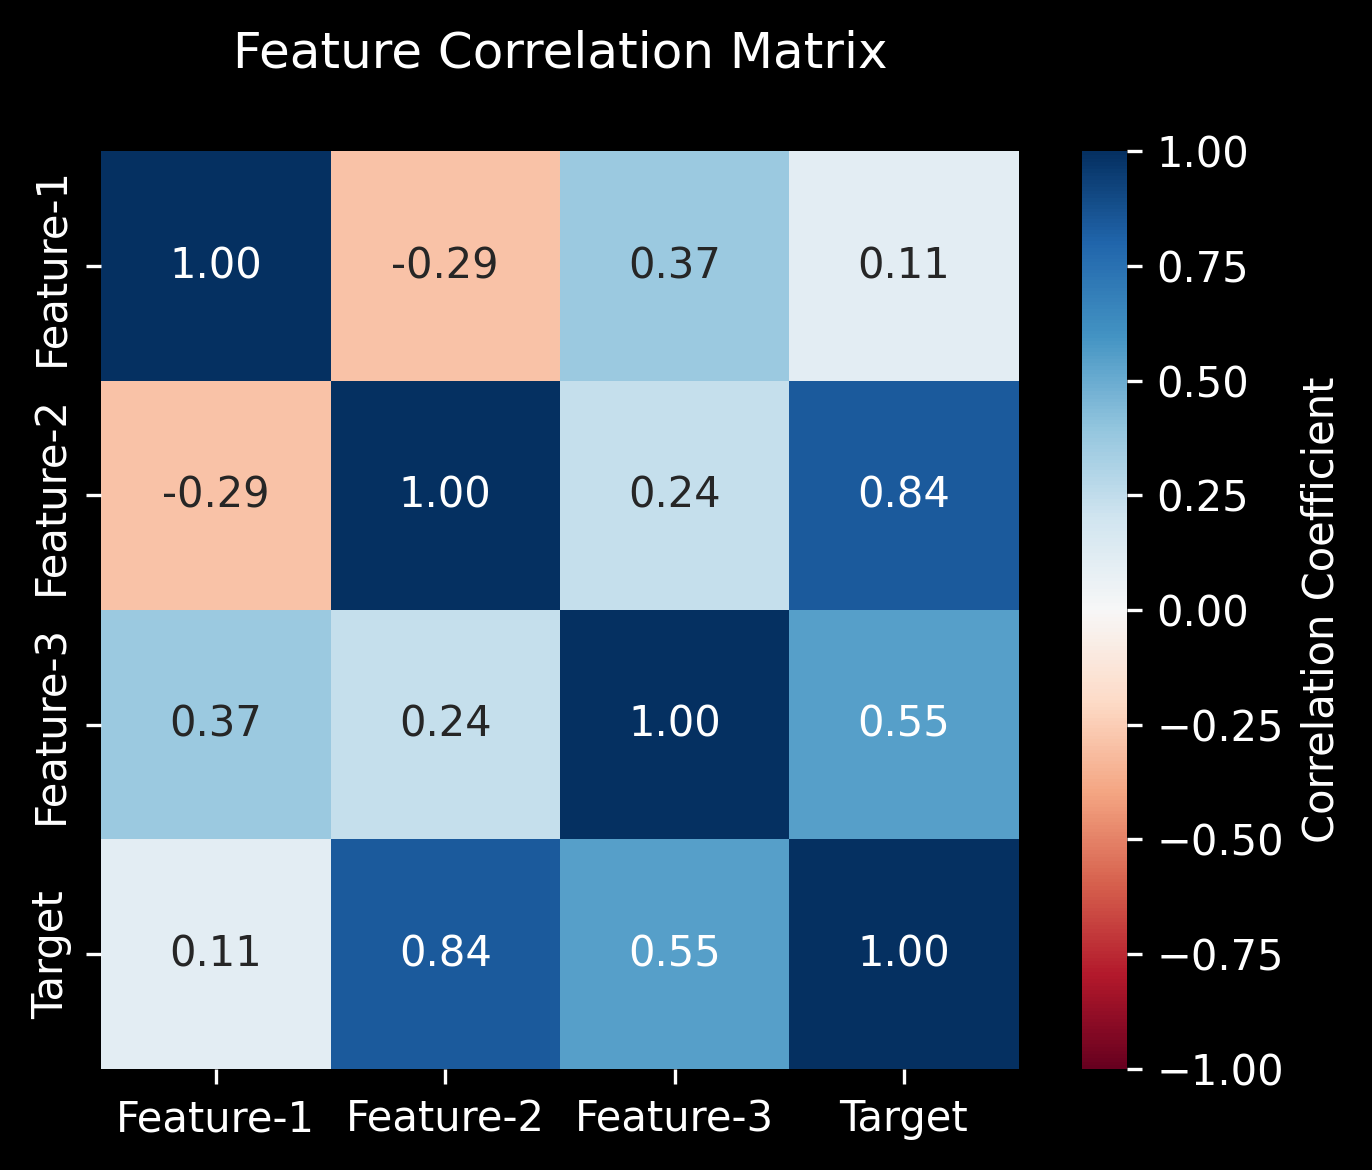

In [3]:
# Show correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(5, 4), dpi=300)

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show numbers
    cmap='RdBu',  # Red-Blue diverging colormap
    vmin=-1, vmax=1,  # Fix the range from -1 to 1
    center=0,  # Center the colormap at 0
    square=True,  # Make the plot square-shaped
    fmt='.2f',  # Show 2 decimal places
    annot_kws={'size': 10},  # Annotation text size
    cbar_kws={'label': 'Correlation Coefficient'}  # Add colorbar label
)

# Adjust layout
plt.title('Feature Correlation Matrix', pad=20)
plt.tight_layout()

# Show plot
plt.show()

In [4]:
# Convert to numpy for calculations
X = X.values
y = y.values

In [5]:
# Check condition number
_, singular_vals, _ = np.linalg.svd(X)
condition_number = singular_vals.max() / singular_vals.min()

In [6]:
# Calculate hat matrix using solve instead of inv
H = X @ np.linalg.solve(X.T @ X, X.T)
H_diagonal = np.diag(H)

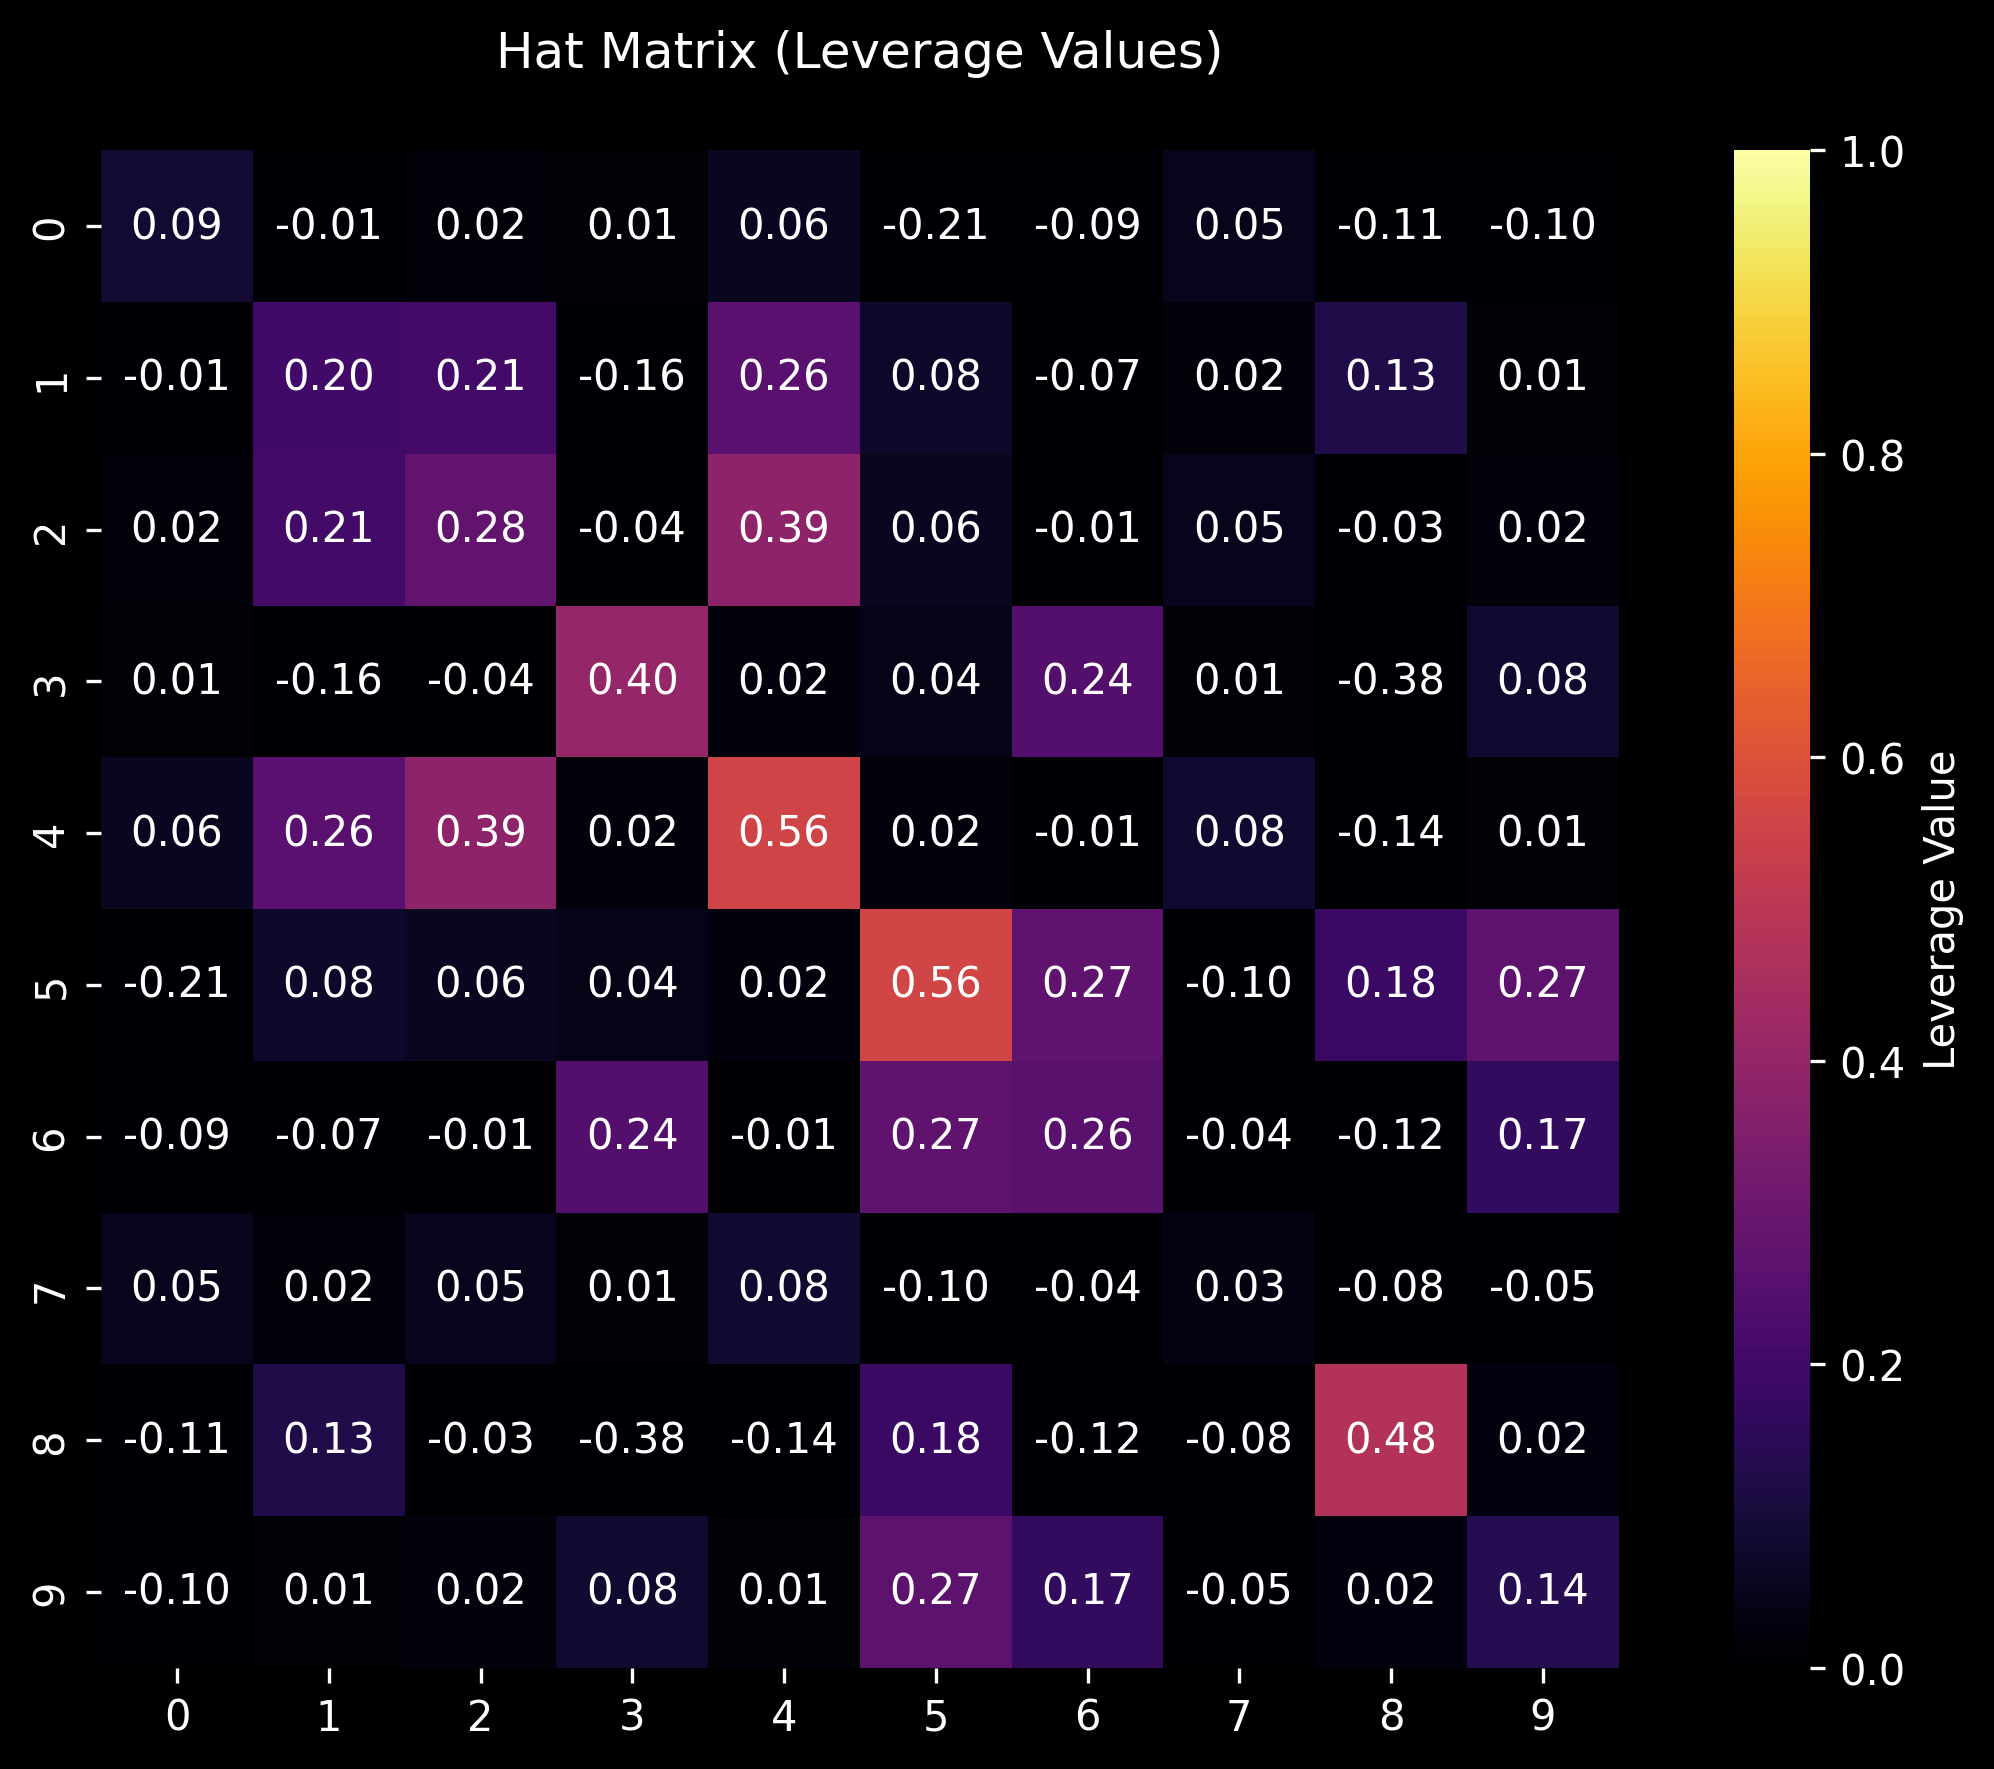

In [7]:
# Plot hat matrix
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(
   H,
   annot=True,
   cmap='inferno',  # Yellow-Orange-Red colormap for leverage
   vmin=0,  # Hat matrix values are between 0 and 1
   vmax=1,
   square=True,
   fmt='.2f',
   annot_kws={'size': 10},
   cbar_kws={'label': 'Leverage Value'}
)
plt.title('Hat Matrix (Leverage Values)', pad=20)
plt.tight_layout()
plt.show()

In [8]:
# Calculate predictions and residuals
y_pred = H @ y
residuals = y - y_pred

# Calculate R² components
mean_deviation = y - y.mean()
SSE = residuals @ residuals
TSS = mean_deviation @ mean_deviation

# Calculate PRESS statistic
scaled_residuals = residuals / (1 - H_diagonal)
PRESS = scaled_residuals @ scaled_residuals

# Calculate R² and predicted R²
r2 = 1 - (SSE / TSS)
predicted_r2 = 1 - (PRESS / TSS)

# Results dictionary for easy access
results = {
   'condition_number': condition_number.item(),
   'R2': r2.item(),
   'predicted_R2': predicted_r2.item(),
   'PRESS': PRESS.item(),
   'SSE': SSE.item(),
   'TSS': TSS.item()
}

In [9]:
# Store and print results
print("\nRegression Analysis Results")
print("-" * 30)
print(f"Condition Number: {condition_number:.2f}")
print(f"R²: {r2:.4f}")
print(f"Predicted R²: {predicted_r2:.4f}")
print(f"PRESS Statistic: {PRESS:.4f}")
print(f"Sum of Squared Errors (SSE): {SSE:.4f}")
print(f"Total Sum of Squares (TSS): {TSS:.4f}")
print("\nLeverage Statistics")
print("-" * 30)
print(f"Average Leverage: {H_diagonal.mean():.4f}")
print(f"Max Leverage: {H_diagonal.max():.4f}")
print(f"Min Leverage: {H_diagonal.min():.4f}")


Regression Analysis Results
------------------------------
Condition Number: 1.56
R²: 0.8811
Predicted R²: 0.7376
PRESS Statistic: 4757.6916
Sum of Squared Errors (SSE): 2154.9772
Total Sum of Squares (TSS): 18130.6399

Leverage Statistics
------------------------------
Average Leverage: 0.3000
Max Leverage: 0.5603
Min Leverage: 0.0341
